In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [35]:
df=pd.read_csv(r'/Users/adarshreddy/Desktop/Assignments/ML/adarshre_dharmaac_assignment1_final/diamond_preprocessed.csv')

In [36]:
display(df.head(5))

,carat,depth,table,price,x,y,z,cut_FAIR,cut_GOOD,cut_IDEAL,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,0.384615,0.125000,0.000000,0.041825,0.577641,0.140468,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,0.448775,0.875000,0.000000,0.030418,0.577641,0.100334,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,0.448775,0.431867,0.000272,0.060837,0.023333,0.100334,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,0.615385,0.500000,0.002177,0.089354,0.076667,0.207358,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,0.846154,0.500000,0.002450,0.115970,0.116667,0.247492,0,1,0,...,0,1,0,0,0,1,0,0,0,0


Mean Squared Error:  0.0029812267523809033
Training Time:  8.760381937026978


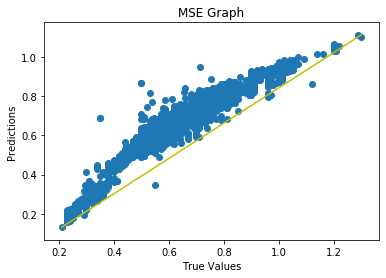

In [37]:
#Gradient decent with 0.0015 leanring rate, 1000 itrs, and initalized weights to 1's
#We were getting nan values and upon checking the reason, we found the weights were getting too large.
#We found that cliping can fix the issue from a medium blog for which reference is provided below.

class Ridgeregression_greadientdecent():
    
    def __init__(self, lamda):
        
        self.learning_rate = 0.0015
        self.lamda = lamda
        self.max_iter = 1000
        self.weights = None
    
    def fit(self, X_train, y_train):
        self.weights = np.ones(X_train.shape[1])
        
        for i in range(self.max_iter):
            y_pred = self.predict(X_train)
            gradient = -2 * (X_train.T @ (y_train-y_pred )) + 2 * self.lamda * self.weights
            gradient = np.clip(gradient, -1, 1)
            new_weights = self.weights - self.learning_rate * gradient
            self.weights = new_weights
    
    def predict(self, X):
        return np.dot(X, self.weights)
    
    def mse(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

X = df.drop(columns=['carat'])
Y = df['carat']

train_test_split = 0.8

train_length = int(train_test_split * len(df))

X_train = X[:train_length]
Y_train = Y[:train_length]
X_test = X[train_length:]
Y_test = Y[train_length:]

ridge_model = Ridgeregression_greadientdecent(lamda=0.01)

start_time = time.time()
ridge_model.fit(X_train, Y_train)
training_time = time.time() - start_time

y_pred = ridge_model.predict(X_test)

mse = ridge_model.mse(y_pred, Y_test)
print("Mean Squared Error: ", mse)
print("Training Time: ",training_time)

plt.scatter(Y_test, y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(y_pred), max(y_pred)], '-y')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('MSE Graph')
plt.show()


Mean Squared Error:  0.00367601697957968
Training Time:  8.658415794372559


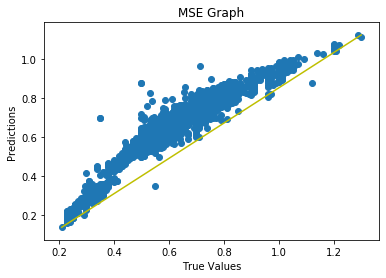

In [38]:
#Gradient decent with 0.001 leanring rate, 1000 itrs, and initalized weights to 0's

class Ridgeregression_greadientdecent():
    
    def __init__(self, lamda):
        
        self.learning_rate = 0.0015
        self.lamda = lamda
        self.max_iter = 1000
        self.weights = None
    
    def fit(self, X_train, y_train):
        self.weights = np.zeros(X_train.shape[1])
        
        for i in range(self.max_iter):
            y_pred = self.predict(X_train)
            gradient = -2 * (X_train.T @ (y_train -y_pred )) + 2 * self.lamda * self.weights
            gradient = np.clip(gradient, -1, 1)
            new_weights = self.weights - self.learning_rate * gradient
            self.weights = new_weights
    
    def predict(self, X):
        return np.dot(X, self.weights)
    
    def mse(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

X = df.drop(columns=['carat'])
Y = df['carat']

train_test_split = 0.8

train_length = int(train_test_split * len(df))

X_train = X[:train_length]
Y_train = Y[:train_length]
X_test = X[train_length:]
Y_test = Y[train_length:]

ridge_model = Ridgeregression_greadientdecent(lamda=0.01)

start_time = time.time()
ridge_model.fit(X_train, Y_train)
training_time = time.time() - start_time

y_pred = ridge_model.predict(X_test)

mse = ridge_model.mse(y_pred, Y_test)
print("Mean Squared Error: ", mse)
print("Training Time: ",training_time)

plt.scatter(Y_test, y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(y_pred), max(y_pred)], '-y')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('MSE Graph')
plt.show()


Mean Squared Error:  0.003667627008913955
Training Time:  9.163730144500732


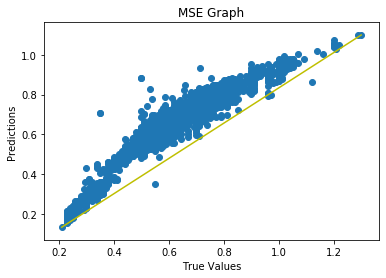

In [39]:
#Gradient decent with 0.0015 leanring rate, 1000 itrs, and initalized weights to random values

class Ridgeregression_greadientdecent():
    
    def __init__(self, lamda):
        
        self.learning_rate = 0.0015
        self.lamda = lamda
        self.max_iter = 1000
        self.weights = None
    
    def fit(self, X_train, y_train):
        self.weights = np.random.rand(X_train.shape[1])
        
        for i in range(self.max_iter):
            y_pred = self.predict(X_train)
            gradient = -2 * (X_train.T @ (y_train -y_pred )) + 2 * self.lamda * self.weights
            gradient = np.clip(gradient, -1, 1)
            new_weights = self.weights - self.learning_rate * gradient
            self.weights = new_weights
    
    def predict(self, X):
        return np.dot(X, self.weights)
    
    def mse(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

X = df.drop(columns=['carat'])
Y = df['carat']

train_test_split = 0.8

train_length = int(train_test_split * len(df))

X_train = X[:train_length]
Y_train = Y[:train_length]
X_test = X[train_length:]
Y_test = Y[train_length:]

ridge_model = Ridgeregression_greadientdecent(lamda=0.01)

start_time = time.time()
ridge_model.fit(X_train, Y_train)
training_time = time.time() - start_time

y_pred = ridge_model.predict(X_test)

mse = ridge_model.mse(y_pred, Y_test)
print("Mean Squared Error: ", mse)
print("Training Time: ",training_time)

plt.scatter(Y_test, y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(y_pred), max(y_pred)], '-y')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('MSE Graph')
plt.show()


how different weight initialization techniques effect the performance
1. We did not see a huge imporvement after using gradient decent.
2. initialization with 1 gave the best results amoung the three tested

Reference:
https://medium.com/@nerdjock/deep-learning-course-lesson-10-2-exploding-gradient-problem-b985e15dc42e#:~:text=When%20the%20network%20is%20deep,might%20result%20in%20NaN%20values.